Re-create the following figure using the `mpg` data set.

In [1]:
library(tidyverse)
mpg %>% head

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


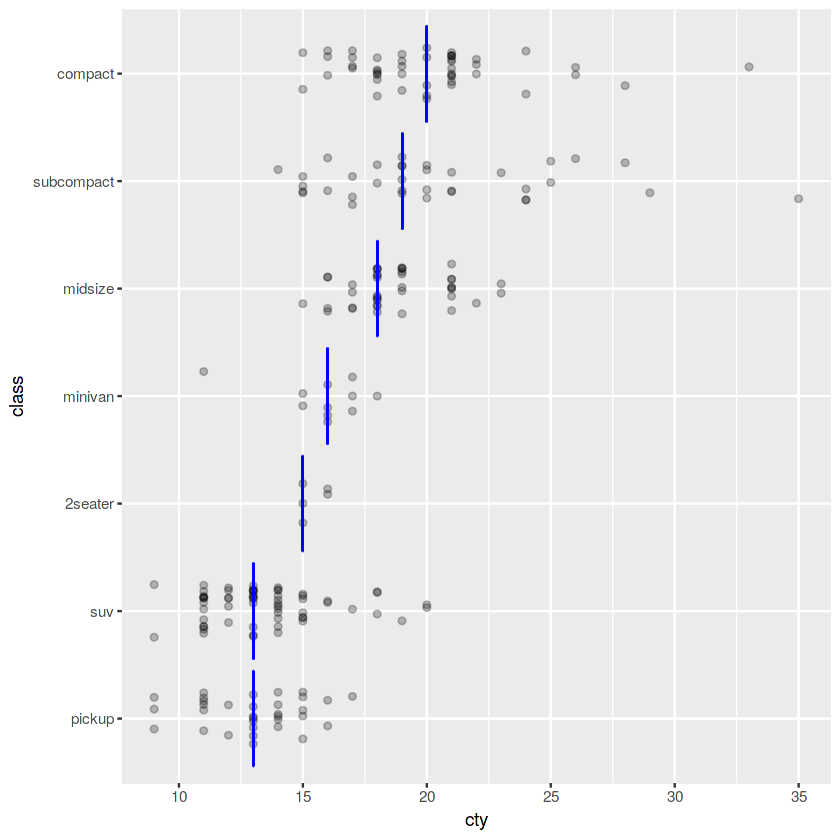

In [9]:
mpg = mpg %>%
    mutate(class=fct_reorder(class,cty, median))

p=ggplot(mpg, aes(x=class, y=cty))
p=p+geom_point(position=position_jitter(h=0, w=.25), alpha=.25)
p=p+coord_flip()

mpg.cty.median=mpg %>%
    group_by(class) %>%
    summarize(cty=median(cty))

p=p+geom_crossbar(data=mpg.cty.median, 
                  size=.25, color='blue', 
                  aes(ymin=cty, 
                  ymax=cty))

p

<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`